In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.dates as mdates

In [ ]:
cases_df = pd.read_csv("cases.csv", parse_dates=['date'])
cases_df = cases_df.fillna(method='ffill')
cases_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
cases_tulsa_df = cases_df[cases_df['county'] == 'Tulsa']
cases_tulsa_df = cases_tulsa_df.reset_index()

cases_la_df = cases_df[cases_df['county'] == 'Los Angeles']
cases_la_df = cases_la_df.reset_index()

cases_nyc_df = cases_df[cases_df['county'] == 'New York City']
cases_nyc_df = cases_nyc_df.reset_index()

max(cases_nyc_df.date.values)

numpy.datetime64('2020-11-12T00:00:00.000000000')

In [ ]:
# Normalize data based on populations
tulsa_population = 401190
la_population = 10039107
nyc_population = 8336817

cases_tulsa_df['deaths_normalized'] = (cases_tulsa_df['deaths'] / tulsa_population) * 100
cases_la_df['deaths_normalized'] = (cases_la_df['deaths'] / la_population) * 100
cases_nyc_df['deaths_normalized'] = (cases_nyc_df['deaths'] / nyc_population) * 100

cases_tulsa_df['cases_normalized'] = (cases_tulsa_df['cases'] / tulsa_population) * 100
cases_la_df['cases_normalized'] = (cases_la_df['cases'] / la_population) * 100
cases_nyc_df['cases_normalized'] = (cases_nyc_df['cases'] / nyc_population) * 100

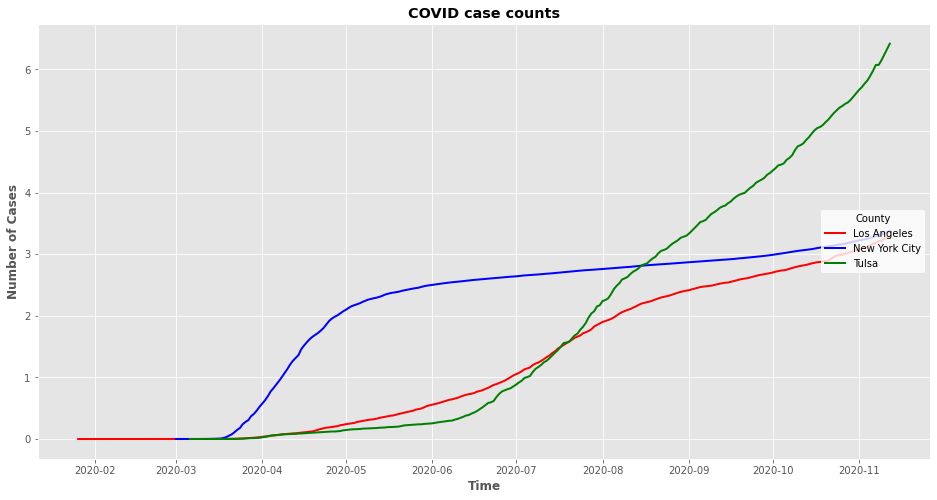

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,8)) 

la_dates = cases_la_df['date'].values
la_deaths = cases_la_df['cases_normalized'].values

tulsa_dates = cases_tulsa_df['date'].values
tulsa_deaths = cases_tulsa_df['cases_normalized'].values

nyc_dates = cases_nyc_df['date'].values
nyc_deaths = cases_nyc_df['cases_normalized'].values

plt.plot(la_dates, la_deaths, color="red",linewidth=2, label="Los Angeles")
plt.plot(nyc_dates, nyc_deaths, color="blue",linewidth=2, label="New York City")
plt.plot(tulsa_dates, tulsa_deaths, color="green",linewidth=2, label="Tulsa")

plt.title("COVID case counts", fontweight="bold")
plt.xlabel("Time", fontweight="bold")
plt.ylabel("Number of Cases", fontweight="bold")
plt.yscale("linear")
# ax.xaxis.set_major_locator(months)

legend = plt.legend(title="County",loc=5, bbox_to_anchor=(1,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

plt.show()

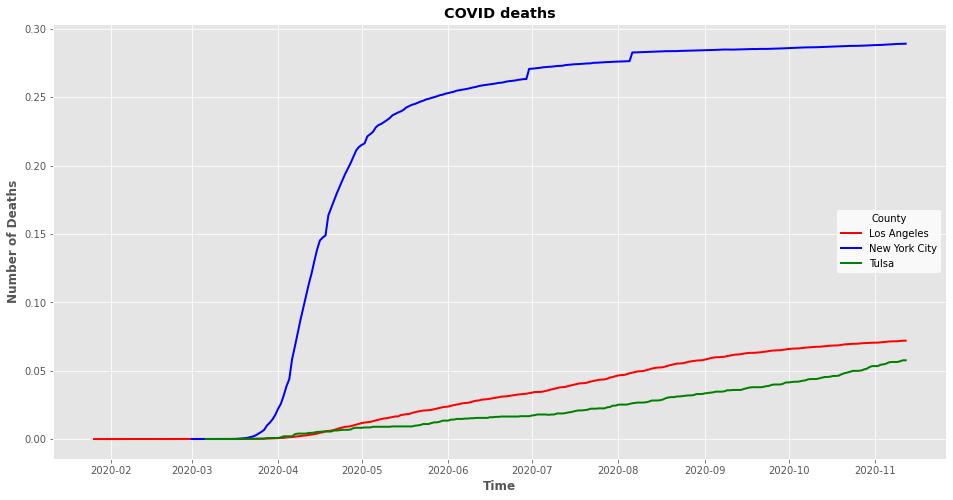

In [ ]:
months = mdates.MonthLocator() 

plt.style.use("ggplot")
plt.figure(figsize=(16,8)) 

la_dates = cases_la_df['date'].values
# la_deaths = cases_la_df['deaths'].values
la_deaths = cases_la_df['deaths_normalized'].values

tulsa_dates = cases_tulsa_df['date'].values
# tulsa_deaths = cases_tulsa_df['deaths'].values
tulsa_deaths = cases_tulsa_df['deaths_normalized'].values

nyc_dates = cases_nyc_df['date'].values
# nyc_deaths = cases_nyc_df['deaths'].values
nyc_deaths = cases_nyc_df['deaths_normalized'].values

plt.plot(la_dates, la_deaths, color="red",linewidth=2, label="Los Angeles")
plt.plot(nyc_dates, nyc_deaths, color="blue",linewidth=2, label="New York City")
plt.plot(tulsa_dates, tulsa_deaths, color="green",linewidth=2, label="Tulsa")

plt.title("COVID deaths", fontweight="bold")
plt.xlabel("Time", fontweight="bold")
plt.ylabel("Number of Deaths", fontweight="bold")
plt.yscale("linear")
# ax.xaxis.set_major_locator(months)

legend = plt.legend(title="County",loc=5, bbox_to_anchor=(1,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

plt.show()

In [ ]:
tulsa_fips = int(cases_tulsa_df['fips'].mean(axis = 0))
nyc_filps = int(cases_nyc_df['fips'].mean(axis = 0))
la_filps = int(cases_la_df['fips'].mean(axis = 0))

masks_df = pd.read_csv("mask_use.csv")
# print(masks_df.head())

mask_tulsa_df = masks_df[masks_df['COUNTYFP'] == tulsa_fips]
mask_tulsa_df = mask_tulsa_df.reset_index()
print(mask_tulsa_df.head())

mask_nyc_df = masks_df[masks_df['COUNTYFP'] == nyc_filps]
mask_nyc_df = mask_nyc_df.reset_index()
print(mask_nyc_df.head())

mask_la_df = masks_df[masks_df['COUNTYFP'] == la_filps]
mask_la_df = mask_la_df.reset_index()
print(mask_la_df.head())

   index  COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0   2202     40143  0.074   0.061      0.141       0.243   0.482
   index  COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0   1831     36007  0.044   0.028      0.051       0.066   0.812
   index  COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0    204      6037  0.021   0.013      0.049       0.131   0.786


In [ ]:
cols = ["NEVER", "RARELY", "SOMETIMES", "FREQUENTLY", "ALWAYS"]
# scores = [1,2,3,4,5]
scores = [-5,-1,0,1,5]
# scores = [0,0,0,0,0]

def cityMaskScore(maskData):
    score = 0
    for i in range(5):
        col, score = cols[i], scores[i]
        val = maskData[col][0]
#         print(val)
        score += score * val
    return score
        
# tulsaMaskScore = cityMaskScore(mask_tulsa_df)
print("Tulsa Mask Score: ", cityMaskScore(mask_tulsa_df))
print("New York City Mask Score: ", cityMaskScore(mask_nyc_df))
print("Los Angeles Mask Score: ", cityMaskScore(mask_la_df))

Tulsa Mask Score:  7.41
New York City Mask Score:  9.06
Los Angeles Mask Score:  8.93


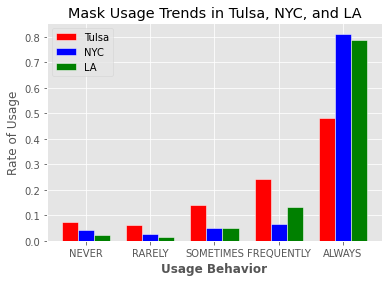

In [ ]:
barWidth = .25

y = mask_tulsa_df.iloc[0].tolist()[2:]
z = mask_nyc_df.iloc[0].tolist()[2:]
k = mask_la_df.iloc[0].tolist()[2:]
x1 = np.arange(len(y))
x2 = [x + barWidth for x in x1]
x3 = [x + barWidth for x in x2]

plt.bar(x1, y, color="red", width=barWidth, edgecolor='white', label='Tulsa')
plt.bar(x2, z, color='blue', width=barWidth, edgecolor='white', label='NYC')
plt.bar(x3, k, color='green', width=barWidth, edgecolor='white', label='LA')

plt.ylabel("Rate of Usage")
plt.xlabel('Usage Behavior', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y))], ["NEVER", "RARELY", "SOMETIMES", "FREQUENTLY", "ALWAYS"])
plt.title("Mask Usage Trends in Tulsa, NYC, and LA")

plt.legend()
plt.show()

In [ ]:
# [dems, repubs, other]
tulsaPoliticalScore = np.array([122961, 185048, 66812])
nycPoliticalScore = np.array([3617982, 530235,1171833])
laPoliticalScore = np.array([2969846, 961000, 1706169])
tulsaPS = tulsaPoliticalScore / sum(tulsaPoliticalScore)
nycPS = nycPoliticalScore / sum(nycPoliticalScore)
laPS = laPoliticalScore / sum(laPoliticalScore)
tulsaPS, nycPS, laPS = tulsaPS[0]-tulsaPS[1], nycPS[0]-nycPS[1], laPS[0]-laPS[1]
print(tulsaPS, nycPS, laPS)

-0.16564440092737598 0.5803981165590549 0.3563669779129557


In [ ]:
g_mobility_df = pd.read_csv("2020_US_Region_Mobility_Report.csv", parse_dates=['date'])
# g_mobility_df.date = pd.to_datetime(g_mobility_df.date)
g_mobility_df = g_mobility_df.fillna(method='ffill')
g_mobility_df.head(1)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0


In [ ]:
# nyc_mobility_df = g_mobility_df[g_mobility_df['iso_3166_2_code'] == "US-NY"]
nyc_mobility_df = g_mobility_df[g_mobility_df['census_fips_code'] == nyc_filps]
print(max(nyc_mobility_df.date.values))
# nyc_mobility_df.dtypes
# nyc_mobility_df.head(50)

2020-11-08T00:00:00.000000000


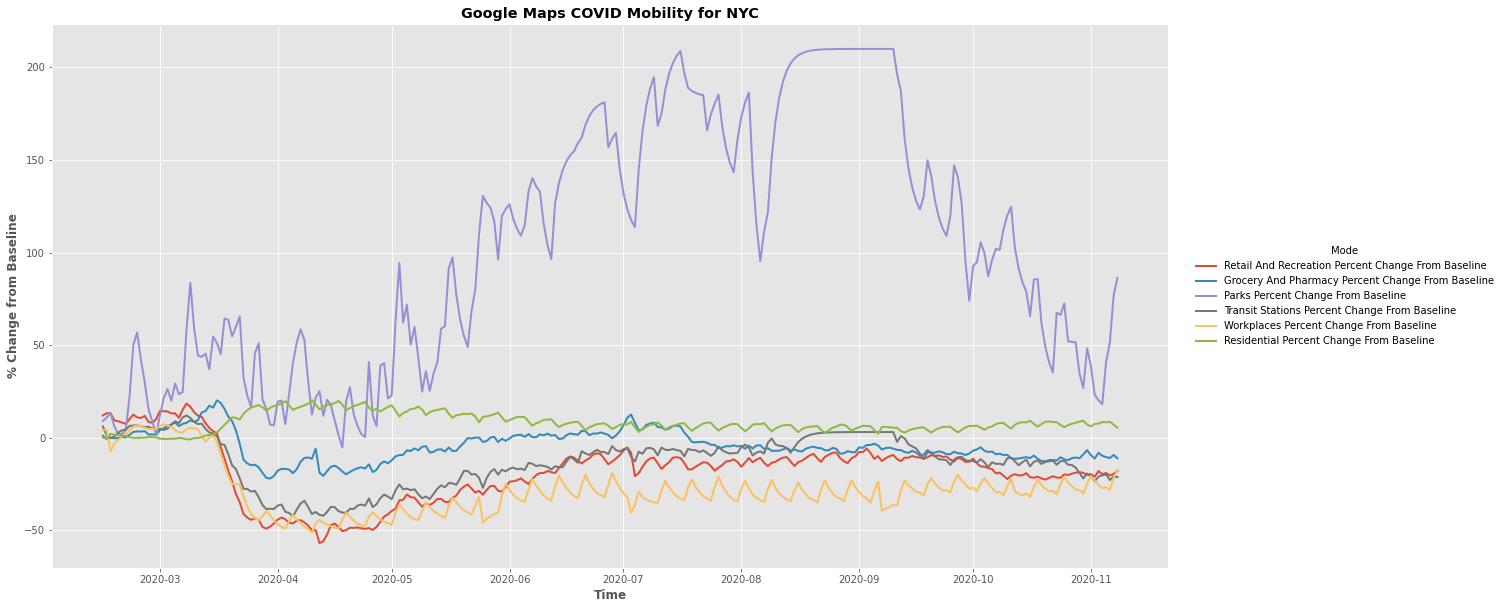

In [ ]:
# Values smoothed for visualization

plt.style.use("ggplot")
plt.figure(figsize=(20,10)) 

nyc_mobility_dates = nyc_mobility_df.date.values
modes = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

for mode in modes:
    smooth = nyc_mobility_df[mode].ewm(span = 5).mean()
    plt.plot(nyc_mobility_dates, 
#              nyc_mobility_df[mode].values,
             smooth,
             linewidth=2, label=mode.replace("_", " ").title())
    

plt.title("Google Maps COVID Mobility for NYC", fontweight="bold")
plt.xlabel("Time", fontweight="bold")
plt.ylabel("% Change from Baseline", fontweight="bold")
plt.yscale("linear")
# ax.xaxis.set_major_locator(months)

legend = plt.legend(title="Mode",loc=5, bbox_to_anchor=(1.3,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

plt.show()

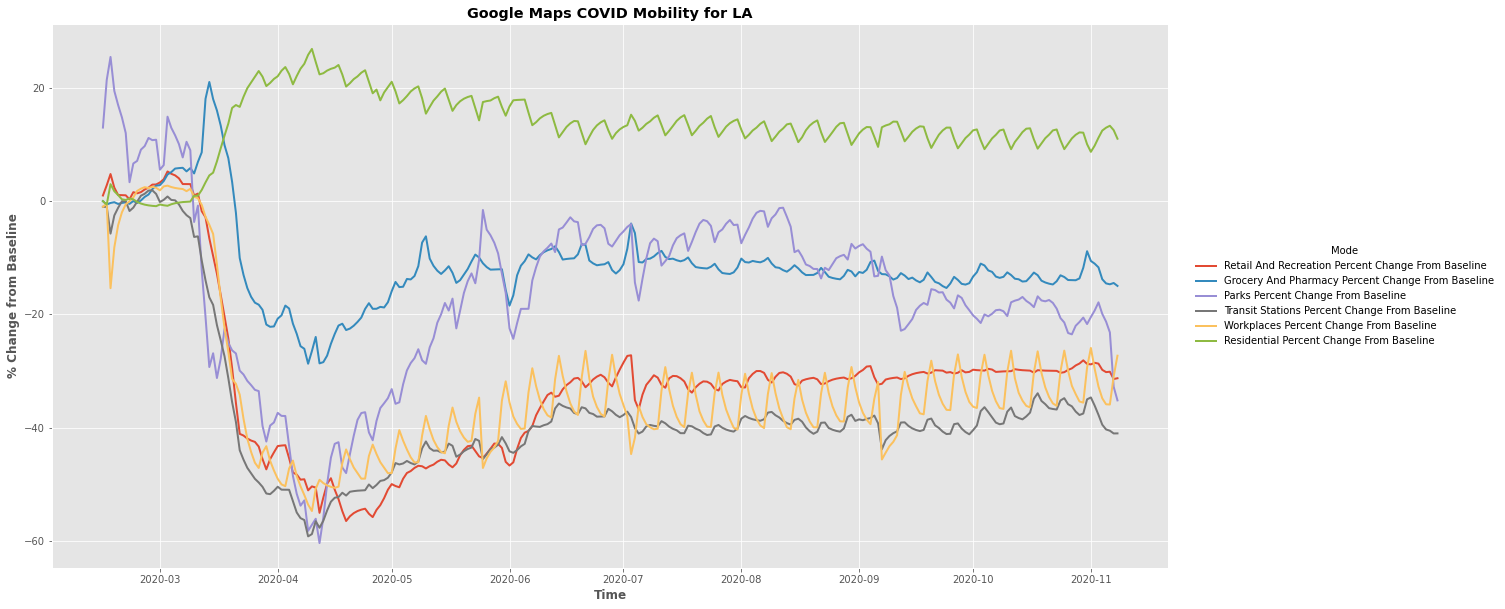

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10)) 

la_mobility_df = g_mobility_df[g_mobility_df['census_fips_code'] == la_filps]
la_mobility_dates = la_mobility_df.date.values

for mode in modes:
    smooth = la_mobility_df[mode].ewm(span = 5).mean()
    plt.plot(la_mobility_dates, 
             smooth,
             linewidth=2, label=mode.replace("_", " ").title())
    

plt.title("Google Maps COVID Mobility for LA", fontweight="bold")
plt.xlabel("Time", fontweight="bold")
plt.ylabel("% Change from Baseline", fontweight="bold")
plt.yscale("linear")
# ax.xaxis.set_major_locator(months)

legend = plt.legend(title="Mode",loc=5, bbox_to_anchor=(1.3,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

plt.show()

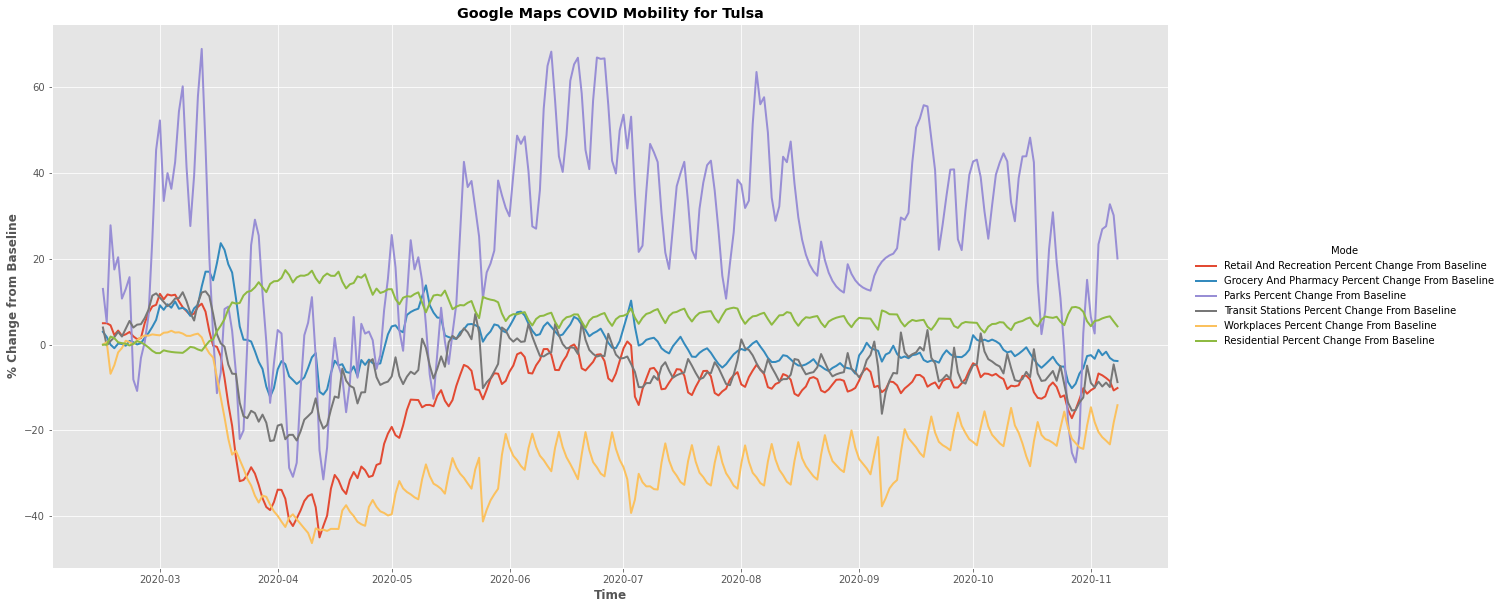

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10)) 

tulsa_mobility_df = g_mobility_df[g_mobility_df['census_fips_code'] == tulsa_fips]
tulsa_mobility_dates = tulsa_mobility_df.date.values

for mode in modes:
    smooth = tulsa_mobility_df[mode].ewm(span = 5).mean()
    plt.plot(tulsa_mobility_dates, 
             smooth,
#              tulsa_mobility_df[mode].values,
             linewidth=2, label=mode.replace("_", " ").title())
    

plt.title("Google Maps COVID Mobility for Tulsa", fontweight="bold")
plt.xlabel("Time", fontweight="bold")
plt.ylabel("% Change from Baseline", fontweight="bold")
plt.yscale("linear")
# ax.xaxis.set_major_locator(months)

legend = plt.legend(title="Mode",loc=5, bbox_to_anchor=(1.3,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

plt.show()

In [ ]:
apple_mobility_df = pd.read_csv("applemobilitytrends.csv")
apple_mobility_df = apple_mobility_df.fillna(method='ffill')

apple_nyc_df = apple_mobility_df[apple_mobility_df['region'] == "New York County"]
apple_nyc_viz_df = apple_nyc_df.mean(axis=0)
apple_nyc_viz_smooth_df = apple_nyc_viz_df.ewm(span = 7).mean()

apple_la_df = apple_mobility_df[apple_mobility_df['region'] == "Los Angeles County"]
apple_la_viz_df = apple_la_df.mean(axis=0)
apple_la_viz_smooth_df = apple_la_viz_df.ewm(span = 7).mean()

apple_tulsa_df = apple_mobility_df[apple_mobility_df['region'] == "Tulsa County"]
apple_tulsa_viz_df = apple_tulsa_df.mean(axis=0)
apple_tulsa_viz_smooth_df = apple_tulsa_viz_df.ewm(span = 7).mean()

/opt/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
nyc_apple_mobility = apple_mobility_df[apple_mobility_df['region'] == "New York County"]
nyc_apple_mobility.drop(['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 'country'], axis=1, inplace=True)
nyc_apple_mobility = nyc_apple_mobility.T.rename(columns={3781: "apple_driving", 3782: "apple_transit", 3783: "apple_walking"})
nyc_apple_mobility['date'] = pd.to_datetime(nyc_apple_mobility.index)
nyc_apple_mobility = nyc_apple_mobility.set_index('date')


la_apple_mobility = apple_mobility_df[apple_mobility_df['region'] == "Los Angeles County"]
la_apple_mobility.drop(['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 'country'], axis=1, inplace=True)
la_apple_mobility = la_apple_mobility.T.rename(columns={3464: "apple_driving", 3465: "apple_transit", 3466: "apple_walking"})
la_apple_mobility['date'] = pd.to_datetime(la_apple_mobility.index)
la_apple_mobility = la_apple_mobility.set_index('date')


tulsa_apple_mobility = apple_mobility_df[apple_mobility_df['region'] == "Tulsa County"]
tulsa_apple_mobility.drop(['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 'country'], axis=1, inplace=True)
tulsa_apple_mobility = tulsa_apple_mobility.T.rename(columns={4428: "apple_driving", 4429: "apple_walking"})
tulsa_apple_mobility['date'] = pd.to_datetime(tulsa_apple_mobility.index)
tulsa_apple_mobility = tulsa_apple_mobility.set_index('date')

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


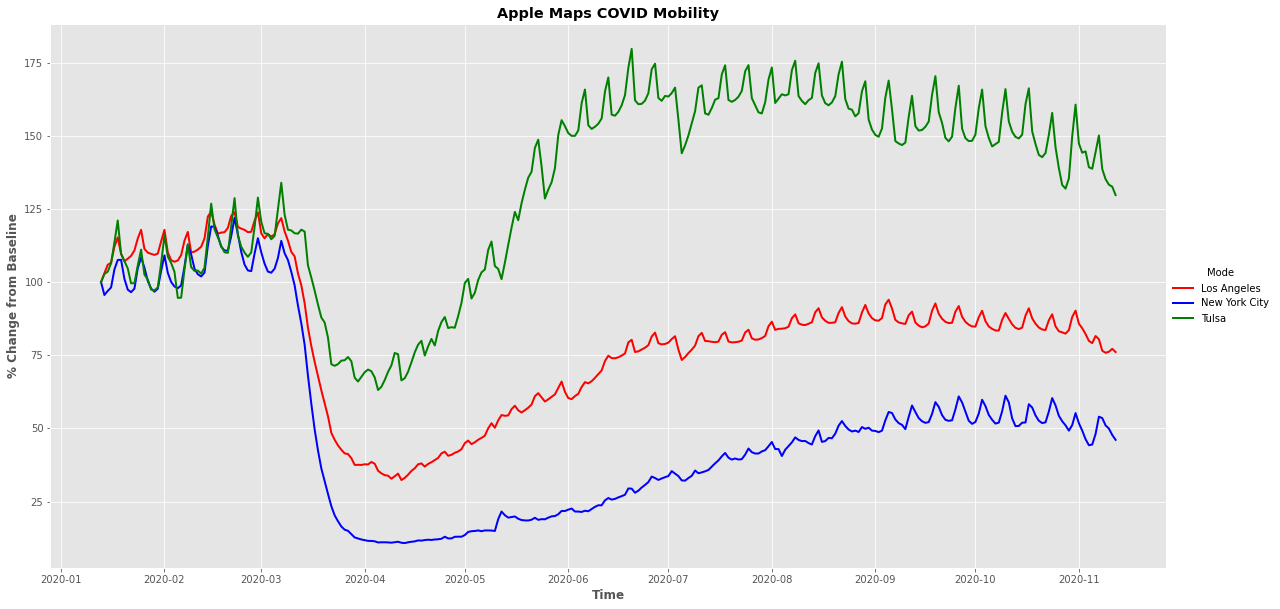

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10)) 

plt.plot(pd.to_datetime(apple_la_viz_df.index), apple_la_viz_smooth_df.values, color="red",linewidth=2, label="Los Angeles")
plt.plot(pd.to_datetime(apple_nyc_viz_df.index), apple_nyc_viz_smooth_df.values, color="blue",linewidth=2, label="New York City")
plt.plot(pd.to_datetime(apple_tulsa_viz_df.index), apple_tulsa_viz_smooth_df.values, color="green",linewidth=2, label="Tulsa")

plt.title("Apple Maps COVID Mobility", fontweight="bold")
plt.xlabel("Time", fontweight="bold")
plt.ylabel("% Change from Baseline", fontweight="bold")
plt.yscale("linear")
# ax.xaxis.set_major_locator(months)

legend = plt.legend(title="Mode",loc=5, bbox_to_anchor=(1.1,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

plt.show()

In [ ]:
# cases_tulsa_df
# cases_la_df
# cases_nyc_df

# print(mask_tulsa_df.head())
# print(mask_nyc_df.head())
# print(mask_la_df.head())

# print("Tulsa Mask Score: ", cityMaskScore(mask_tulsa_df))
# print("New York City Mask Score: ", cityMaskScore(mask_nyc_df))
# print("Los Angeles Mask Score: ", cityMaskScore(mask_la_df))

# nyc_mobility_df
# la_mobility_df
# tulsa_mobility_df

# apple_nyc_df
# apple_la_df
# apple_tulsa_df

# cases_tulsa_df.head()

print(tulsaPS, nycPS, laPS)
# Tulsa Mask Score:  7.41
# New York City Mask Score:  9.06
# Los Angeles Mask Score:  8.93

-0.16564440092737598 0.5803981165590549 0.3563669779129557


In [ ]:
# Final Data Preparation for Tulsa

cases_tulsa_df.set_index('date')
cases_tulsa_df.drop(cases_tulsa_df.columns.difference(
        ['date', 'cases', 'deaths',
       'deaths_normalized', 'cases_normalized']), 1, inplace=True)

tulsa_mobility_df.set_index('date')
tulsa_mobility_df.drop(tulsa_mobility_df.columns.difference(
        ['date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']), 1, inplace=True)


mask_tulsa_df = mask_tulsa_df.rename(columns={"NEVER": "mask_never", "RARELY": "mask_rarely", "SOMETIMES": "mask_sometimes", "FREQUENTLY": "mask_frequently", "ALWAYS": "mask_always"})
mask_tulsa_df.drop(mask_tulsa_df.columns.difference(
        ['mask_never', 'mask_rarely', 'mask_sometimes', 'mask_frequently',
       'mask_always']), 1, inplace=True)

# apple_tulsa_df = apple_tulsa_df.to_frame()
# apple_tulsa_df = apple_tulsa_df.rename(columns={0: "apple_mobility"})
# apple_tulsa_df['date'] = apple_tulsa_df.index
# apple_tulsa_df = apple_tulsa_df[['apple_mobility']]

print(cases_tulsa_df.columns)
print(mask_tulsa_df.columns)
print(tulsa_mobility_df.columns)
print(tulsa_apple_mobility.columns)

Index(['date', 'cases', 'deaths', 'deaths_normalized', 'cases_normalized'], dtype='object')
Index(['mask_never', 'mask_rarely', 'mask_sometimes', 'mask_frequently',
       'mask_always'],
      dtype='object')
Index(['date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')
Index(['apple_driving', 'apple_walking'], dtype='object')
/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
tulsa_data = cases_tulsa_df.set_index('date').join(tulsa_mobility_df.set_index('date'))
tulsa_data = tulsa_data.join(tulsa_apple_mobility)
tulsa_data["maskScore"] = 7.41

tulsa_data["mask_never"] = 0.074
tulsa_data["mask_rarely"] = 0.061
tulsa_data["mask_sometimes"] = 0.141
tulsa_data["mask_frequently"] = 0.243
tulsa_data["mask_always"] = 0.482

tulsa_data["PSScore"] = tulsaPS

tulsa_data = tulsa_data.dropna()

# Final Tulsa Df
tulsa_data.to_csv("tulsa_data.csv")

In [ ]:
# Final Data Preparation for Los Angeles

cases_la_df.set_index('date')
cases_la_df.drop(cases_la_df.columns.difference(
        ['date', 'cases', 'deaths',
       'deaths_normalized', 'cases_normalized']), 1, inplace=True)

la_mobility_df.set_index('date')
la_mobility_df.drop(la_mobility_df.columns.difference(
        ['date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']), 1, inplace=True)


mask_la_df = mask_la_df.rename(columns={"NEVER": "mask_never", "RARELY": "mask_rarely", "SOMETIMES": "mask_sometimes", "FREQUENTLY": "mask_frequently", "ALWAYS": "mask_always"})
mask_la_df.drop(mask_la_df.columns.difference(
        ['mask_never', 'mask_rarely', 'mask_sometimes', 'mask_frequently',
       'mask_always']), 1, inplace=True)


In [ ]:
la_data = cases_la_df.set_index('date').join(la_mobility_df.set_index('date'))
la_data = la_data.join(la_apple_mobility)
la_data["maskScore"] = 8.93

la_data["mask_never"] = 0.021
la_data["mask_rarely"] = 0.013
la_data["mask_sometimes"] = 0.049
la_data["mask_frequently"] = 0.131
la_data["mask_always"] = 0.786

la_data["PSScore"] = laPS

# la_data[la_data.isnull().any(axis=1)]

la_data = la_data.dropna()

# Final LA Df
la_data.to_csv("la_data.csv")

In [ ]:
# Final Data Preparation for NYC

cases_nyc_df.set_index('date')
cases_nyc_df.drop(cases_nyc_df.columns.difference(
        ['date', 'cases', 'deaths',
       'deaths_normalized', 'cases_normalized']), 1, inplace=True)

nyc_mobility_df.set_index('date')
nyc_mobility_df.drop(nyc_mobility_df.columns.difference(
        ['date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']), 1, inplace=True)


mask_nyc_df = mask_nyc_df.rename(columns={"NEVER": "mask_never", "RARELY": "mask_rarely", "SOMETIMES": "mask_sometimes", "FREQUENTLY": "mask_frequently", "ALWAYS": "mask_always"})
mask_nyc_df.drop(mask_nyc_df.columns.difference(
        ['mask_never', 'mask_rarely', 'mask_sometimes', 'mask_frequently',
       'mask_always']), 1, inplace=True)
       

nyc_data = cases_nyc_df.set_index('date').join(nyc_mobility_df.set_index('date'))
nyc_data = nyc_data.join(nyc_apple_mobility)

nyc_data["maskScore"] = 9.06
nyc_data["mask_never"] = 0.044
nyc_data["mask_rarely"] = 0.028
nyc_data["mask_sometimes"] = 0.051
nyc_data["mask_frequently"] = 0.066
nyc_data["mask_always"] = 0.812

nyc_data["PSScore"] = nycPS

nyc_data = nyc_data.dropna()

# Final NYC Df
nyc_data.to_csv("nyc_data.csv")